#Dữ liệu

Tiêu đề: Rental Bike Sharing Dataset   
Link: https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing  
Nội dung: dataset gồm có 3 file
- day.csv: dữ liệu thống kê theo ngày (Tổng cộng: 731 ngày)
- hour.csv: dữ liệu thống kê theo giờ (Tổng cộng: 17379 giờ)
- Readme.txt: nguồn gốc, cách dùng, thông tin các trường & bản quyền dữ liệu

#Thiết lập & Cài đặt

In [ ]:
# Các thư viện cần thiết cho bài làm này
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats

In [ ]:
# Điều chỉnh kích thước và độ phóng chung cho các biểu đồ: figSize & dpi
sns.set()
pd.set_option('display.max_columns', None) 
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 80

In [ ]:
# Kết nối Google Colab vào Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Kiem tra vi tri hien tai 
!pwd

/content/drive/My Drive/ML


In [ ]:
# Chuyen den vi tri thu muc hien tai
%cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
# Kiem tra vi tri hien tai 
!pwd

/content/drive/MyDrive/ML


In [ ]:
# Liet ke file
!ls

 1stNet.h5	    hour.csv		      'Tài liệu không có tiêu đề.gdoc'
 1stNet.ipynb	    __MACOSX		       test.p
 day.csv	    mini_speech_commands       traffic-signs-data.zip
 DemoASRNet.ipynb   mini_speech_commands.zip   train.p
 DS.ipynb	    Readme.txt		       valid.p


#Khám phá dữ liệu

##Đọc dữ liệu

In [ ]:
# Đọc dữ liệu từ file day.csv & hour.csv
df_day = pd.read_csv('./day.csv', encoding= 'unicode_escape')
df_hour = pd.read_csv('./hour.csv', encoding= 'unicode_escape')

In [ ]:
# Hiển thị dữ liệu
# df = df.drop(['instant'], axis=1)
# df.head()
df_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [ ]:
# Hiển thị dữ liệu
df_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

## Số dòng & số cột của dữ liệu

In [ ]:
n_rows_day, n_cols_day = df_day.shape
print('Số dòng:',n_rows_day)
print('Số cột:', n_cols_day)

Số dòng: 731
Số cột: 16


In [ ]:
n_rows_hour, n_cols_hour = df_hour.shape
print('Số dòng:',n_rows_hour)
print('Số cột:', n_cols_hour)

Số dòng: 17379
Số cột: 17


##Phương pháp Bootstrap

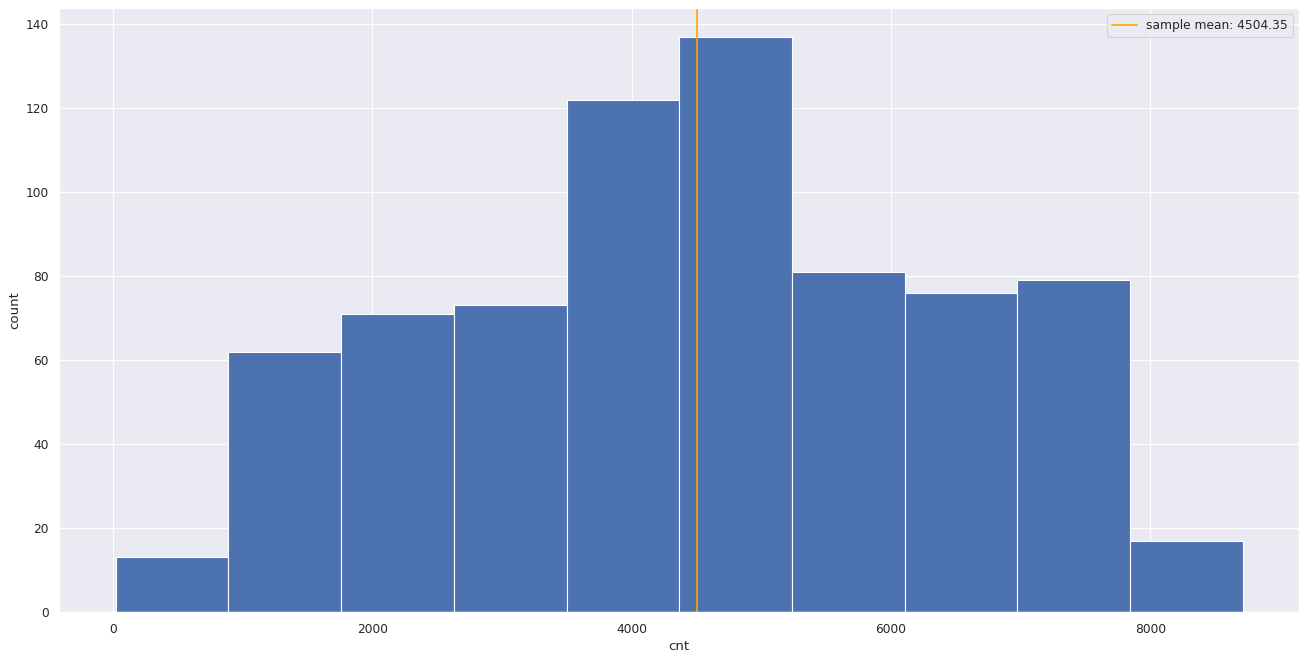

In [ ]:
# Chọn đặc trưng số lượng người dùng (cnt)
x = df_day['cnt'].values

# Trung bình mẫu 
x_mean = np.mean(x)

# Histogram 
plt.hist(x, bins=10)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('cnt')
plt.ylabel('count')
plt.legend(loc=1)
plt.show()

$$SE_{\bar{x}} = \frac{s}{\sqrt{n}}$$

Với 

*   s: std                         

*   n: kích thước mẫu



In [ ]:
# Sai lệch chuẩn
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('Standard error (SE)', se)

Standard error (SE) 71.65035379358156


In [ ]:
# Bootstrap Method
def bootstrap_method(data, n_bootstrap_samples, seed=None):
  # Random
  rng = np.random.RandomState(seed)
  # Create sample mean array
  sample_means = np.zeros(shape=n_bootstrap_samples)
  # Loop
  for i in range(n_bootstrap_samples):
    # Generates a random sample from a given 1-D array
    boot_sample = rng.choice(data, size=data.shape[0], replace=True)
    # Calc mean of sample
    bootstrap_replicate = np.mean(boot_sample)
    # Add to array
    sample_means[i] = bootstrap_replicate
  return sample_means

In [ ]:
# Hàm chạy Bootstrap
def RunBootstrapMethod(n, M, ci):
  # n: sample size
  # M: number of bootstrap samplings
  # ci: confidence interval in %
  # Return values: Sampling Distribution Histogram & Mean Confidence Interval
  boot_M = bootstrap_method(x, n_bootstrap_samples=M, seed=123)

  boot_mean = np.mean(boot_M)
  plt.hist(boot_M, bins=15)
  plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
  plt.xlabel('cnt')
  plt.ylabel('count')
  plt.legend(loc=2)
  plt.show()
  
  std = np.std(boot_M, ddof=1)
  se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
  # print('standard error', se)

  lower, upper = np.percentile(boot_M, [2.5, 97.5])


  return se, lower, upper

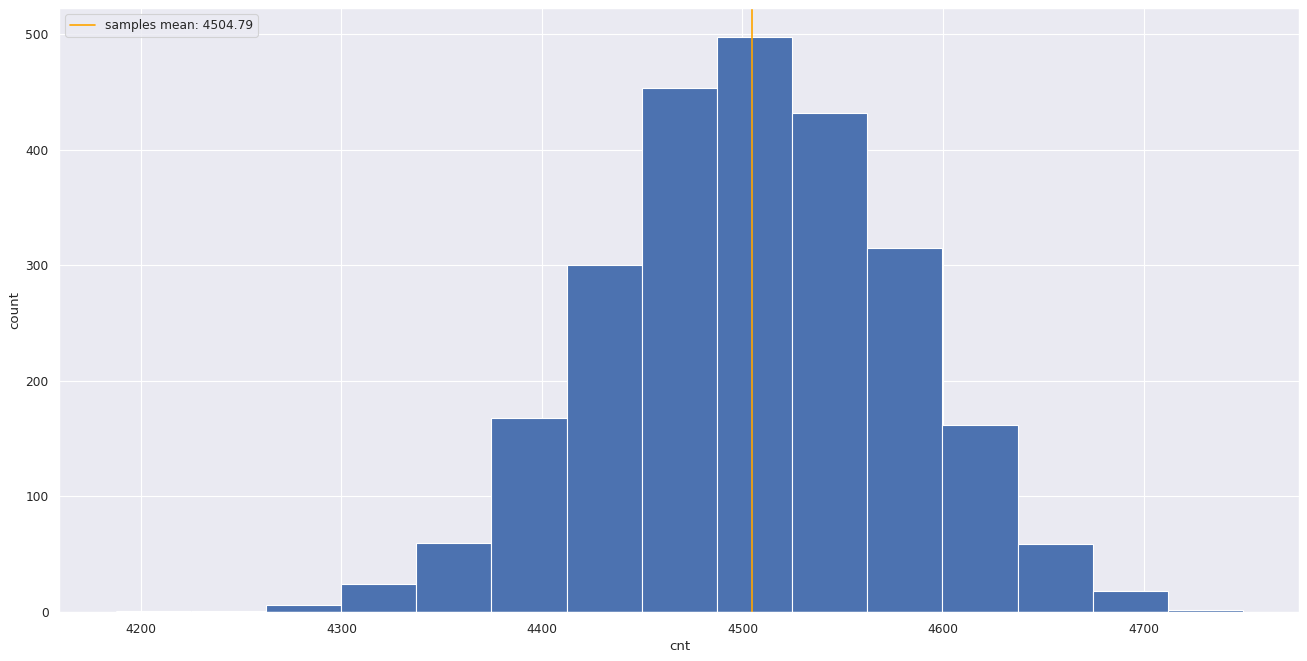

In [ ]:
se, lower, upper = RunBootstrapMethod(x.shape[0], 2500, 0.95)

In [ ]:
lower, upper

(4386.199658002735, 4621.020793433653)

In [ ]:
# So sánh kết quả 
import scipy.stats
def confidence_interval(x, ci=0.95):
    x_mean = np.mean(x)
    se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
    h = se * scipy.stats.t._ppf((1 + ci)/2. , x.shape[0])
    return x_mean - h, x_mean + h

lower, upper = confidence_interval(x, ci=0.95)

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [4363.68, 4645.01]


##Xử lí ngoại lai

In [ ]:
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

removed_outliers_day = df_day
removed_outliers_hour = df_hour
columns_to_remove_outliers = ['temp', 'hum', 'atemp', 'casual', 'registered','cnt']
for column in columns_to_remove_outliers:
    removed_outliers_day = df_day = remove_outlier_IQR(removed_outliers_day, column)
    removed_outliers_hour = df_day = remove_outlier_IQR(removed_outliers_hour, column)
    
print("Sau khi lọc ngoại lai của dữ liệu theo ngày", str(len(removed_outliers_day)), "rows.")
print("Sau khi lọc ngoại lai của dữ liệu theo giờ", str(len(removed_outliers_hour)), "rows.")

Sau khi lọc ngoại lai của dữ liệu theo ngày 14339 rows.
Sau khi lọc ngoại lai của dữ liệu theo giờ 15242 rows.


##Các dòng dữ liệu

###Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [ ]:
# Lấy mẫu 10 dòng ngẫu nhiên trong dataset
df_day.sample(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
551      552  2012-07-05       3   1     7        0        4           1   
398      399  2012-02-03       1   1     2        0        5           1   
10        11  2011-01-11       1   0     1        0        2           1   
721      722  2012-12-22       1   1    12        0        6           0   
517      518  2012-06-01       2   1     6        0        5           1   
390      391  2012-01-26       1   1     1        0        4           1   
159      160  2011-06-09       2   0     6        0        4           1   
119      120  2011-04-30       2   0     4        0        6           0   
651      652  2012-10-13       4   1    10        0        6           0   
524      525  2012-06-08       2   1     6        0        5           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
551           1  0.827500  0.761367  0.457917   0.194029    1405        4836   
398           1  0.313333  0.309346  0.526667   0.178496     310        3841   
10            2  0.169091  0.191464  0.686364   0.122132      43        1220   
721           1  0.265833  0.236113  0.441250   0.407346     205        1544   
517           2  0.654167  0.607962  0.755417   0.237563     533        3594   
390           2  0.341667  0.356050  0.769583   0.073396     244        3831   
159           2  0.808333  0.757579  0.568333   0.149883     563        3352   
119           1  0.472500  0.464021  0.503333   0.235075    1965        3347   
651           1  0.393333  0.391396  0.494583   0.146142    2252        4857   
524           1  0.649167  0.597862  0.467917   0.175383    1488        6248   

      cnt  
551  6241  
398  4151  
10   1263  
721  1749  
517  4127  
390  4075  
159  3915  
119  5312  
651  7109  
524  7736

In [ ]:
# Lấy mẫu 10 dòng ngẫu nhiên trong dataset
df_hour.sample(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
13998    13999  2012-08-11       3   1     8  11        0        6   
7993      7994  2011-12-04       4   0    12  17        0        0   
17289    17290  2012-12-28       1   1    12   6        0        5   
17111    17112  2012-12-20       4   1    12  18        0        4   
12955    12956  2012-06-29       3   1     6   0        0        5   
15160    15161  2012-09-28       4   1     9  21        0        5   
9334      9335  2012-01-29       1   1     1  20        0        0   
2539      2540  2011-04-20       2   0     4  17        0        3   
13909    13910  2012-08-07       3   1     8  18        0        2   
14848    14849  2012-09-15       3   1     9  21        0        6   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
13998           0           1  0.74  0.6970  0.66     0.1642     203   
7993            0           1  0.38  0.3939  0.76     0.1343      38   
17289           1           1  0.22  0.2121  0.64     0.2836       2   
17111           1           2  0.34  0.3333  0.71     0.1940      22   
12955           1           1  0.74  0.6667  0.48     0.1343      24   
15160           1           3  0.60  0.6212  0.53     0.1940      32   
9334            0           1  0.30  0.2879  0.39     0.2239      13   
2539            1           2  0.74  0.6515  0.37     0.4179      34   
13909           1           2  0.76  0.7121  0.62     0.1642     103   
14848           0           1  0.56  0.5303  0.52     0.1045      86   

       registered  cnt  
13998         296  499  
7993          207  245  
17289          49   51  
17111         359  381  
12955          90  114  
15160         205  237  
9334           98  111  
2539          398  432  
13909         711  814  
14848         210  296

➡️ Mỗi dòng ở trong dữ liệu trên ứng với thông tin mượn xe đạp công cộng của 1 ngày trong năm từ tháng 01-2011 đến hết tháng 12-2012 (khoảng 2 năm). Nhìn chung có vẻ không có dòng nào "lạc loài" (có nghĩa là không có vấn đề gì các dòng có ý nghĩa khác nhau). 

###Dữ liệu các dòng có bị lặp hay không?

In [ ]:
df_day[df_day.duplicated(keep=False)]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [ ]:
df_hour[df_hour.duplicated(keep=False)]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

➡️ Vậy dữ liệu không có dòng nào bị trùng như dự đoán ban đầu của ta.

###Dữ liệu trong các dòng có bị thiếu không ?

In [ ]:
# Xác định các missing values trong các dòng của dataset
df__day_null = df_day.isnull()
df__day_null

instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   
730    False   False   False  False  False    False    False       False   

     weathersit   temp  atemp    hum  windspeed  casual  registered    cnt  
0         False  False  False  False      False   False       False  False  
1         False  False  False  False      False   False       False  False  
2         False  False  False  False      False   False       False  False  
3         False  False  False  False      False   False       False  False  
4         False  False  False  False      False   False       False  False  
..          ...    ...    ...    ...        ...     ...         ...    ...  
726       False  False  False  False      False   False       False  False  
727       False  False  False  False      False   False       False  False  
728       False  False  False  False      False   False       False  False  
729       False  False  False  False      False   False       False  False  
730       False  False  False  False      False   False       False  False  

[731 rows x 16 columns]

In [ ]:
# Xác định các missing values trong các dòng của dataset
df__hour_null = df_hour.isnull()
df__hour_null

instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False    False    False   
17375    False   False   False  False  False  False    False    False   
17376    False   False   False  False  False  False    False    False   
17377    False   False   False  False  False  False    False    False   
17378    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False       False  False  False  False      False   False   
1           False       False  False  False  False      False   False   
2           False       False  False  False  False      False   False   
3           False       False  False  False  False      False   False   
4           False       False  False  False  False      False   False   
...           ...         ...    ...    ...    ...        ...     ...   
17374       False       False  False  False  False      False   False   
17375       False       False  False  False  False      False   False   
17376       False       False  False  False  False      False   False   
17377       False       False  False  False  False      False   False   
17378       False       False  False  False  False      False   False   

       registered    cnt  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
17374       False  False  
17375       False  False  
17376       False  False  
17377       False  False  
17378       False  False  

[17379 rows x 17 columns]

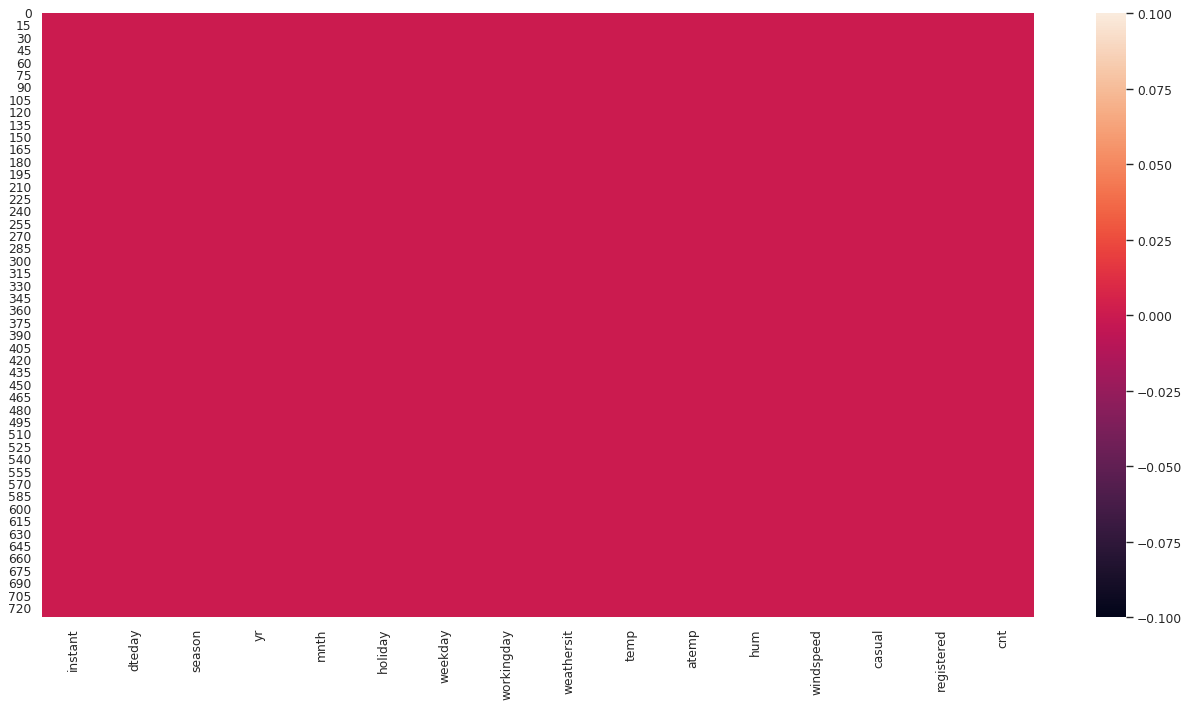

In [ ]:
# Biểu diễn vị trí của các giá trị bị thiếu thông qua HeatMap
sns.heatmap(df__day_null)

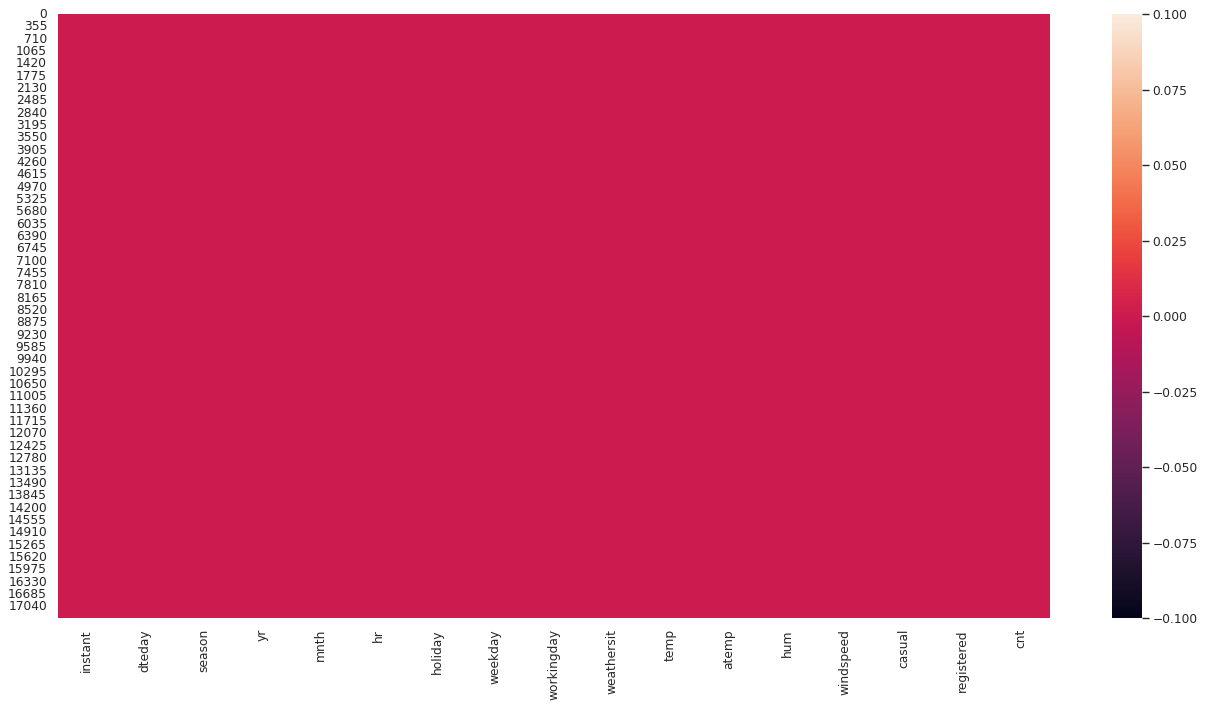

In [ ]:
# Biểu diễn vị trí của các giá trị bị thiếu thông qua HeatMap
sns.heatmap(df__hour_null)

➡️ Nhìn heatmap ta thấy được dữ liệu đều đồng 1 màu trơn (ngay tại giá trị 0.0) và không có thêm màu nào khác. Từ đó có thể thấy không có giá trị nào bị thiếu.  

##Các cột dữ liệu

###Ý nghĩa các cột

In [ ]:
# Liệt kê các cột dữ liệu
list(df_day.columns.values)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [ ]:
# Liệt kê các cột dữ liệu
list(df_hour.columns.values)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

Lưu ý: Thông tin các cột có thể bị sai lệch có thể cách hiểu của từng người khác nhau.
Để mang tính khách quan khuyến khích người đọc nên tham khảo nguồn thông tin bằng tiếng Anh chính thức.
Thông tin các cột có thể đọc thêm tại đường dẫn phía trên.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [ ]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

|Tên cột|Ý nghĩa|
|----------- |----------- |
|dteday |Ngày dữ liêu được thu thập theo đơn vị tháng / ngày / năm.|
|season|Các mùa trong năm (1: Xuân, 2: Hạ, 3: Thu, 4: Đông).|
|yr|Năm (0: 2011, 1:2012)|
|mnth|Tháng (1 - 12)|
|hr|Giờ (0 - 23)|
|holiday|Ngày nghỉ là 1, ngược lại là 0|
|weekday|Thứ trong tuần từ chủ nhật đến thứ bảy tuần sau có giá trị tương ứng từ 0 - 6|
|workingday|Nếu không phải cuối tuần hay ngày lễ là 1, ngược lại là 0|
|weathersit|Mô tả thời tiết: <br /><br /> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1. Trời trong, ít‎‎‎‎‎‎‎‎‎‎‎‎‎‎‎ mây <br /><br />    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     ‎2. Trời có sương mù & có mây <br /><br /> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3. Tuyết rơi nhẹ, Mưa nhẹ + Sấm chớp + Mây rải rác <br /><br />   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4. Mưa lớn + Mưa đá + Sấm chớp + Sương mù, Tuyết + Sương mù|
|temp|Nhiệt độ ngoài trời (°C) đã được chuẩn hóa bằng cách chia cho giá trị lớn nhất (41)|
|atemp|Nhiệt độ cảm giác (°C) đã được chuẩn hóa bằng cách chia cho giá trị lớn nhất (50)|
|hum|Độ ẩm ngoài trời (%)|
|windspeed|Sức gió ngoài trời tính tại thời điểm thu thập đơn vị m/s đã được chuẩn hóa bằng cách chia cho giá trị lớn nhất (67)|
|casual|Số lượng người dùng thông thường|
|registered|Số lượng người dùng đã đăng ký|
|cnt|Tổng số lượng người dùng thông thường & đã đăng ký|


➡ Các dữ liệu trong các cột đều ở dạng số nên sẽ thuận tiện cho việc xử lí & phân tích dữ liệu.

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##Phân loại dữ liệu

Trong dataset trên có 2 loại dữ liệu là dạng số (numerical) & dạng phân loại (categorical)

In [ ]:
# Gom những cột ít hơn 25 giá trị khác nhau vào dạng phân loại
unique_counts = df_hour.nunique() < 25
categorical  = unique_counts[unique_counts == True].index.tolist()
categorical.extend(df_hour.select_dtypes(exclude=["number","bool_"]).columns.tolist())
categorical

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'dteday']

In [ ]:
# Gom những cột còn lại vào dạng số
numeric = [x for x in df_hour.columns.tolist() if x not in categorical]
numeric

['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

##Phân bố dữ liệu

###Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị median
- Giá trị max

In [ ]:
# Hàm tính 
def calculate_quartile(data):
  nume_col_info_df = pd.DataFrame()
  for col in data.keys():
    missing = data[col].isnull().sum()
    missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]), 1)
    mean_value = data[col].mean()
    min_value = data[col].min()
    lower_quartile = data[col].quantile(0.25)
    median = data[col].median()
    upper = data[col].quantile(0.75)
    max_value = data[col].max()
    row_line = pd.Series([missing,missing_percentage,mean_value, min_value, lower_quartile, median, upper, max_value], 
                            index = ['num_missing','missing_percentage', 'mean','min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
    nume_col_info_df[col] = row_line
  return nume_col_info_df

In [ ]:
calculate_quartile(df_hour[numeric])

instant      temp     atemp       hum  windspeed  \
num_missing             0.0  0.000000  0.000000  0.000000   0.000000   
missing_percentage      0.0  0.000000  0.000000  0.000000   0.000000   
mean                 8690.0  0.496987  0.475775  0.627229   0.190098   
min                     1.0  0.020000  0.000000  0.000000   0.000000   
lower_quartile       4345.5  0.340000  0.333300  0.480000   0.104500   
median               8690.0  0.500000  0.484800  0.630000   0.194000   
upper_quartile      13034.5  0.660000  0.621200  0.780000   0.253700   
max                 17379.0  1.000000  1.000000  1.000000   0.850700   

                        casual  registered         cnt  
num_missing           0.000000    0.000000    0.000000  
missing_percentage    0.000000    0.000000    0.000000  
mean                 35.676218  153.786869  189.463088  
min                   0.000000    0.000000    1.000000  
lower_quartile        4.000000   34.000000   40.000000  
median               17.000000  115.000000  142.000000  
upper_quartile       48.000000  220.000000  281.000000  
max                 367.000000  886.000000  977.000000

###Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số và các cột có dạng số nhưng có ít hơn 25 giá trị khác nhau, ta sẽ tính:

- Số các giá trị thiếu và tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu) 
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

In [ ]:
missing = [];missing_percentage=[];num_values=[];value_percentages=[]

for column in categorical:
    missing.append(df_hour[column].isnull().sum())
    missing_percentage.append((df_hour[column].isnull().sum() * 100 / len(df_hour)).round(1))
    temp = df_hour[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cat_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=list(categorical))
cat_info_df

season                  yr  \
num_missing                                            0                   0   
missing_percentage                                   0.0                 0.0   
num_values                                             4                   2   
value_percentages   {3: 25.9, 2: 25.4, 1: 24.4, 4: 24.4}  {1: 50.3, 0: 49.7}   

                                                                 mnth  \
num_missing                                                         0   
missing_percentage                                                0.0   
num_values                                                         12   
value_percentages   {5: 8.6, 7: 8.6, 12: 8.5, 8: 8.5, 3: 8.5, 10: ...   

                                                                   hr  \
num_missing                                                         0   
missing_percentage                                                0.0   
num_values                                                         24   
value_percentages   {17: 4.2, 16: 4.2, 13: 4.2, 15: 4.2, 14: 4.2, ...   

                              holiday  \
num_missing                         0   
missing_percentage                0.0   
num_values                          2   
value_percentages   {0: 97.1, 1: 2.9}   

                                                              weekday  \
num_missing                                                         0   
missing_percentage                                                0.0   
num_values                                                          7   
value_percentages   {6: 14.5, 0: 14.4, 5: 14.3, 1: 14.3, 3: 14.2, ...   

                            workingday                          weathersit  \
num_missing                          0                                   0   
missing_percentage                 0.0                                 0.0   
num_values                           2                                   4   
value_percentages   {1: 68.3, 0: 31.7}  {1: 65.7, 2: 26.1, 3: 8.2, 4: 0.0}   

                                                               dteday  
num_missing                                                         0  
missing_percentage                                                0.0  
num_values                                                        731  
value_percentages   {'2011-01-01': 0.1, '2012-04-03': 0.1, '2012-0...

###Số lượng các giá trị khác nhau? Show một vài giá trị & xem chúng có gì bất thường không?

In [ ]:
from matplotlib import cycler 
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB']) 
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors) 
plt.rc('grid', color='w', linestyle='solid') 
plt.rc('xtick', direction='out', color='gray') 
plt.rc('ytick', direction='out', color='gray') 
plt.rc('patch', edgecolor='#E6E6E6') 
plt.rc('lines', linewidth=2)

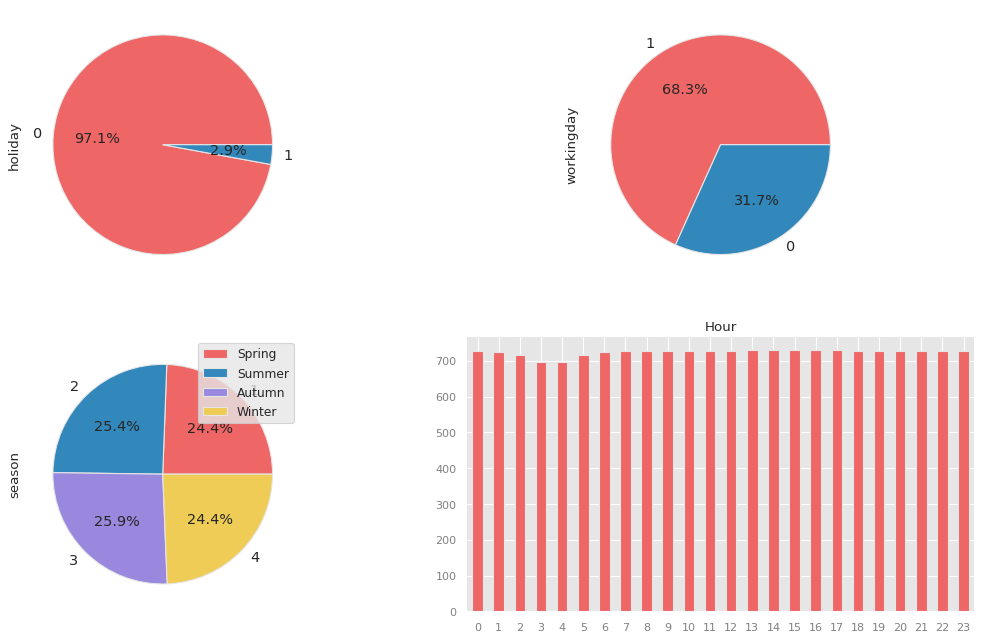

In [ ]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
df_hour['holiday'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax = axis[0,0], fontsize=13)
df_hour['workingday'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax = axis[0,1], fontsize=13)
df_hour.season.value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%',ax = axis[1,0], fontsize=13)
axis[1,0].legend(['Spring','Summer','Autumn','Winter'])

df_hour.hr.value_counts().sort_index().plot(kind='bar',ax = axis[1,1], fontsize=10).set_title('Hour')
axis[1,1].tick_params(axis='x', rotation=0)

###Sơ lược mối tương quan giữa các cột

Có vẻ như dữ liệu không có gì bất thường tuy nhiên ta sẽ tìm hiểu thêm về mối tương quan giữa các biến và kiểm tra xem có dữ liệu nào là outlier hay noise hay không.

In [ ]:
# Tìm sự tương quan giữa các cột
df_day_corr = df_day.corr()
df_hour_corr = df_hour.corr()

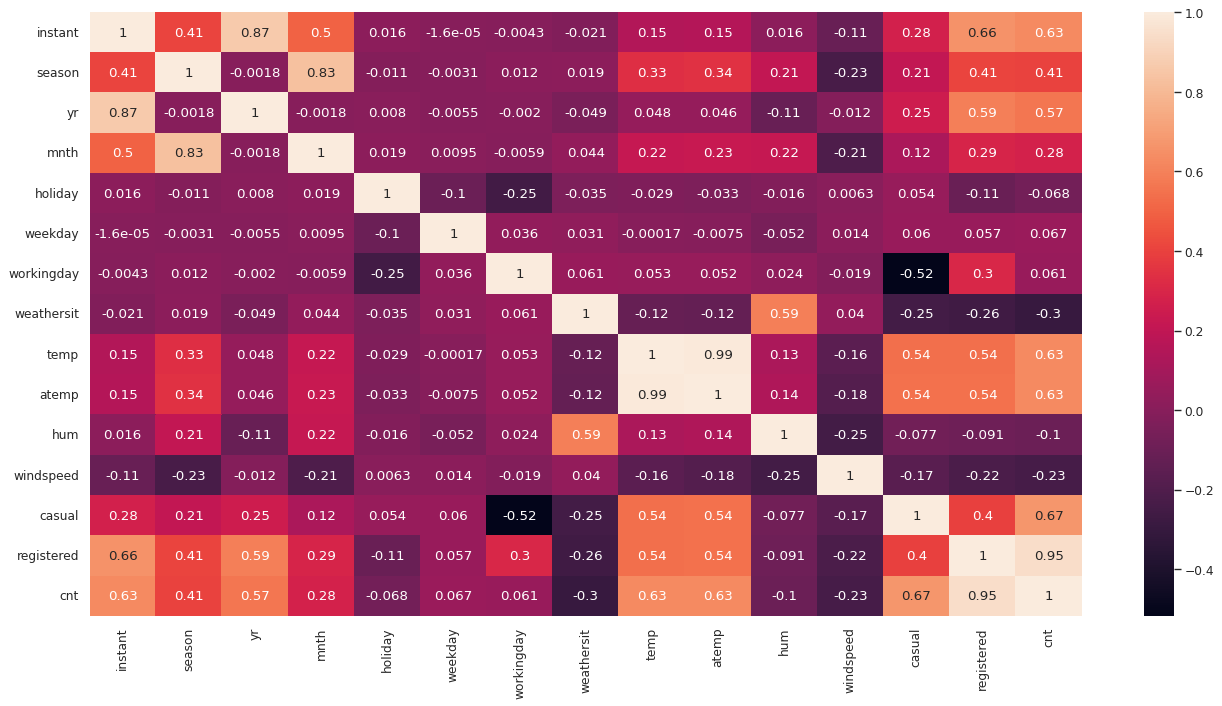

In [ ]:
# Biểu diễn sự tương quan bằng heatmap
sns.heatmap(df_day_corr, annot=True)

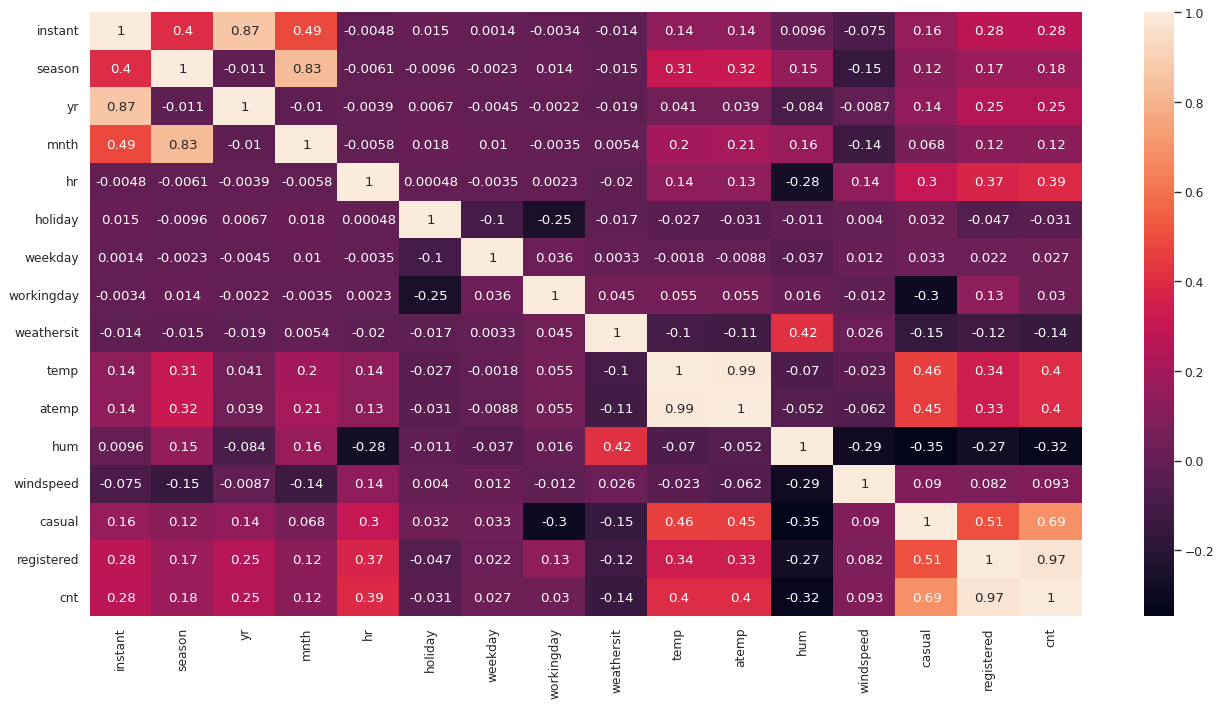

In [ ]:
sns.heatmap(df_hour_corr, annot=True)

➡️ Nhìn vào heatmap, ta có thể thấy được các mối quan hệ đồng biến, nghịch biến giữa các cột với nhau. Ví dụ: cột cnt có tương quan lớn với cột hr, temp, atemp, hum & casual

##Phân tích dữ liệu

🎯 <font size="4"> Dựa theo sự tương quan phía trên ta thấy từ Heatmap sẽ tiến hành đặt trước một số câu hỏi nhằm xác định hướng phân tích dữ liệu để tránh lòng vòng</font> 

| **Câu hỏi** | **Ý nghĩa** |
| --- | --- |
| Sự phát triển về số lượng người dùng của hệ thống theo thời gian là như thế nào? | Tìm hiểu nguyên nhân & điều chỉnh chính sách nhằm cải thiện số lượng người dùng |
| Khoảng thời gian xe đạp thường được dùng nhiều nhất và ít nhất? | Điều chỉnh lượng xe đạp cũng như các dịch vụ đi kèm để phù hợp với từng khoảng thời gian trong ngày. Ví dụ như vào giờ cao điểm thì tăng thêm các dịch vụ về sửa xe đạp hay lượng nhân viên hướng dẫn cách sử dụng. |
| Vào những ngày nghỉ lễ hay ngày cuối tuần thì lượng xe đạp như thế nào so với những ngày đi làm bình thường?| Biết được xu hướng người dân thích sử dụng xe đạp khi đi làm việc hay đi dạo, đi chơi |
| Lượng xe đạp theo từng mùa/ từng tháng có sự thay đổi như thế nào?  | Đưa ra các chiến lược thuê xe phù hợp cho từng thời điểm trong năm.Tăng cường nhân lực vào những mùa được nhiều người dùng |


 <font size="3"></font> 

In [ ]:
# Mô tả dữ liệu
day_descrb = df_day.describe()

In [ ]:
day_descrb

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  registered_ratio  casual_ratio  
count   731.000000   731.000000   731.000000        731.000000    731.000000  
mean    848.176471  3656.172367  4504.348837          0.824402      0.175598  
std     686.622488  1560.256377  1937.211452          0.107375      0.107375  
min       2.000000    20.000000    22.000000          0.489676      0.013177  
25%     315.500000  2497.000000  3152.000000          0.785196      0.099321  
50%     713.000000  3662.000000  4548.000000          0.851216      0.148784  
75%    1096.000000  4776.500000  5956.000000          0.900679      0.214804  
max    3410.000000  6946.000000  8714.000000          0.986823      0.510324

In [ ]:
# Mô tả dữ liệu
hour_descrb = df_hour.describe()

In [ ]:
hour_descrb

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

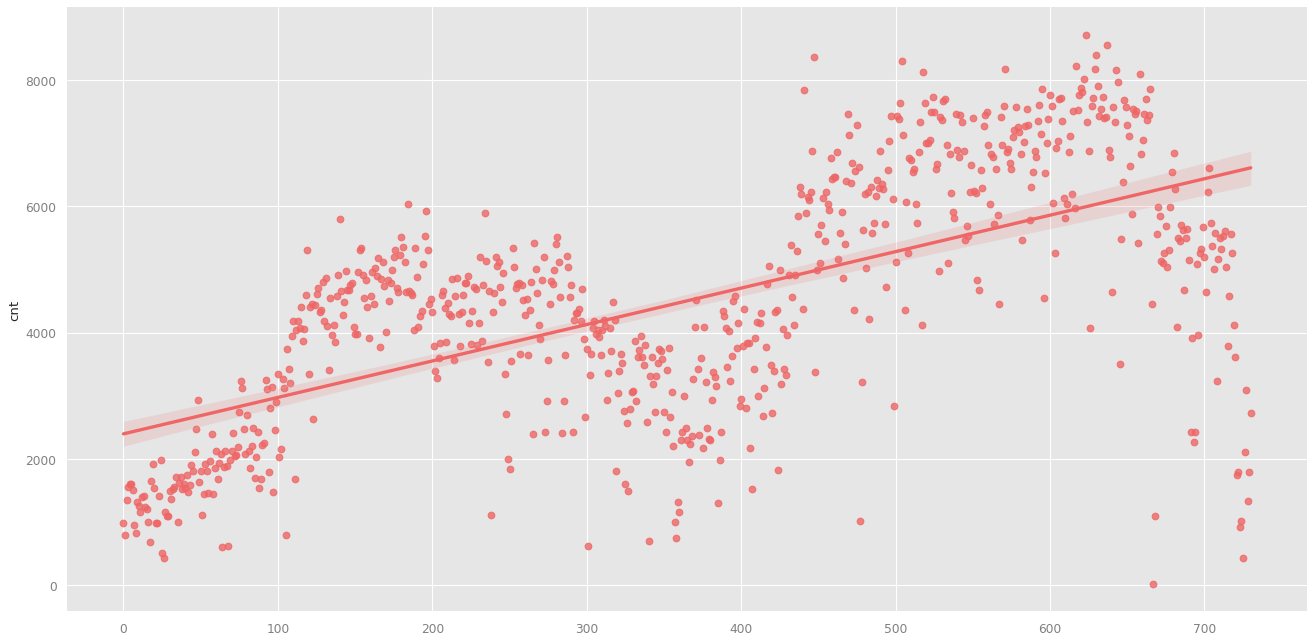

In [ ]:
# Biểu đồ về sự phát triển của người dùng hệ thống bao gồm cả casual & registered
# df_day.plot.scatter("dteday", "cnt")
sns.regplot(x=df_day.index, y="cnt", data=df_day)

➡ Nhìn vào biểu đồ có thể thấy số lượng người dùng có xu hướng tăng lên theo thời gian, đặc biệt tăng nhanh từ khoảng ngày thứ 0 - 200 (trong vòng 6 tháng đầu năm 2011) & từ ngày thứ 400 - 500 (trong vòng 3 tháng đầu năm 2012)

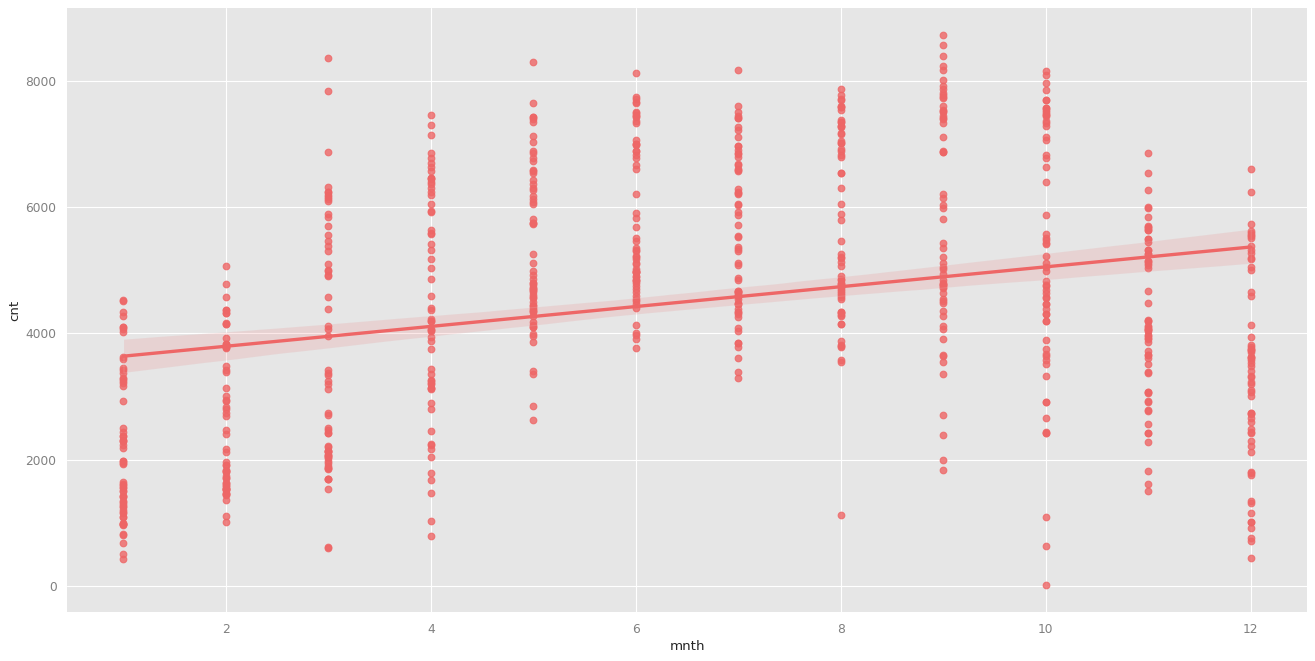

In [ ]:
# Biểu đồ số lượng người dùng theo tháng
# df_day.plot.scatter("mnth", "cnt")
sns.regplot(x="mnth", y="cnt", data=df_day)

➡️ Nhìn vào biểu đồ ta thấy từ tháng 4 - 10 số lượng người dùng cao hơn hẳn so với 3 tháng đầu năm & cuối năm.

Từ Heatmap ở trên, ta đã biết số lượng người dùng & nhiệt độ, tháng, mùa có sự tương quan lớn

In [ ]:
# Thêm 1 trường mới đại diện cho tỉ lệ số lượng người dùng đã đăng ký so với tổng lượng người dùng 
df_day["registered_ratio"] = df_day["registered"] / df_day["cnt"]

In [ ]:
# Kiểm tra dữ liệu của trường mới được thêm vào
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  registered_ratio  
0   985          0.663959  
1   801          0.836454  
2  1349          0.911045  
3  1562          0.930858  
4  1600          0.948750

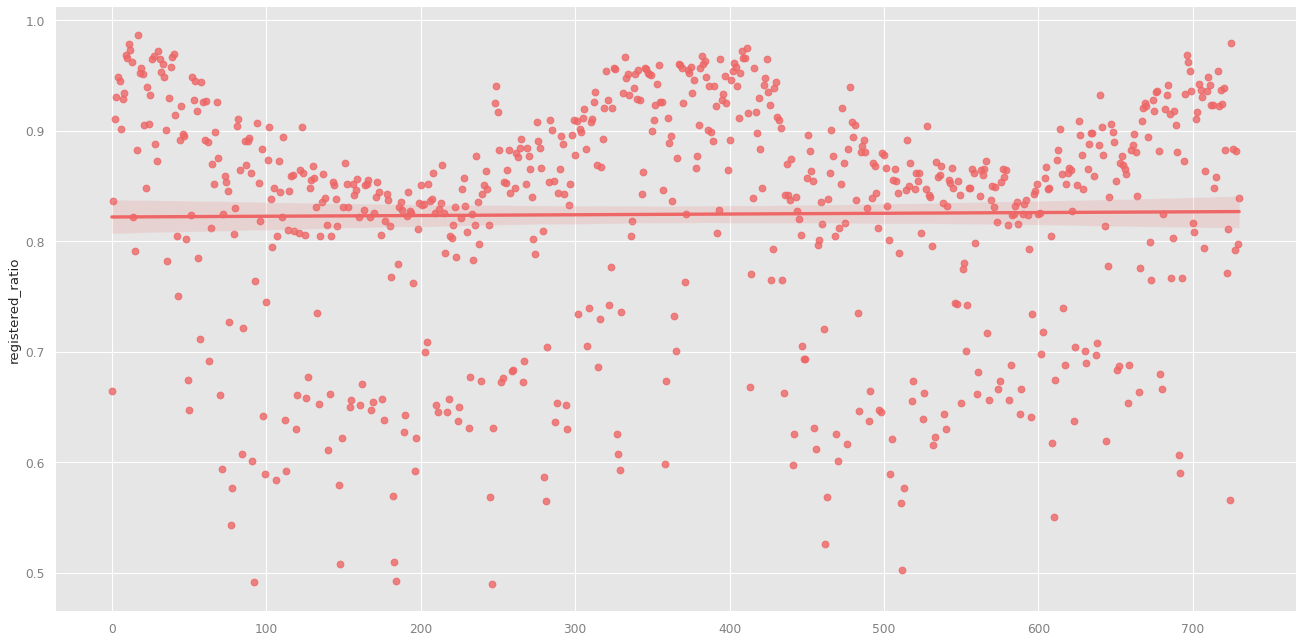

In [ ]:
# Biểu đồ thể hiện phân bố tỉ lệ người dùng đã đăng ký theo ngày
sns.regplot(x=df_day.index, y="registered_ratio", data=df_day)

➡️ Lượng người đăng ký từ ngày thứ 100 - 200 (tháng 4 - 7 năm 2011) & ngày thứ 500 - 600 (tháng 4 - 7 năm 2012) đều có xu hướng giảm đi. 

In [ ]:
# Thêm 1 trường mới đại diện cho tỉ lệ số lượng người dùng đã đăng ký so với tổng lượng người dùng 
df_day["casual_ratio"] = df_day["casual"] / df_day["cnt"]

In [ ]:
# Kiểm tra dữ liệu của trường mới được thêm vào
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  registered_ratio  casual_ratio  
0   985          0.663959      0.336041  
1   801          0.836454      0.163546  
2  1349          0.911045      0.088955  
3  1562          0.930858      0.069142  
4  1600          0.948750      0.051250

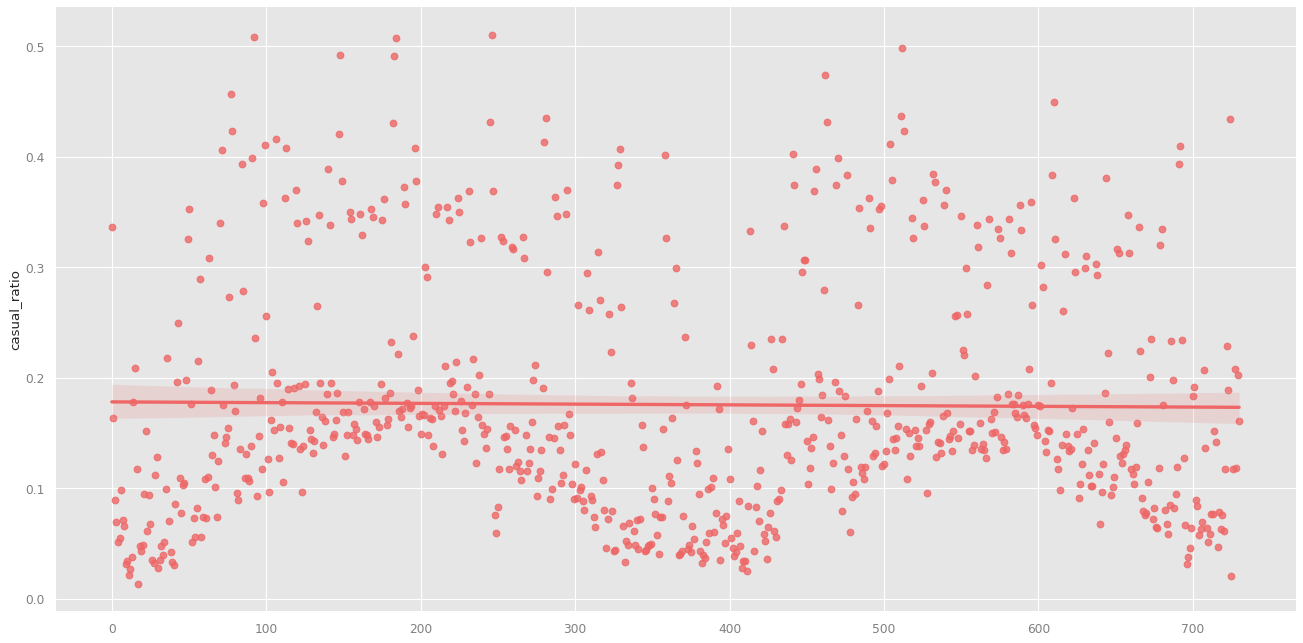

In [ ]:
# Biểu đồ thể hiện phân bố tỉ lệ người dùng thường theo ngày
sns.regplot(x=df_day.index, y="casual_ratio", data=df_day)

➡️ Lượng người dùng thường có xu hướng tăng từ ngày thứ 0-200 (trong vòng 6 tháng đầu năm 2011) & từ ngày thứ 400-600 (trong vòng 6 tháng đầu năm 2012).

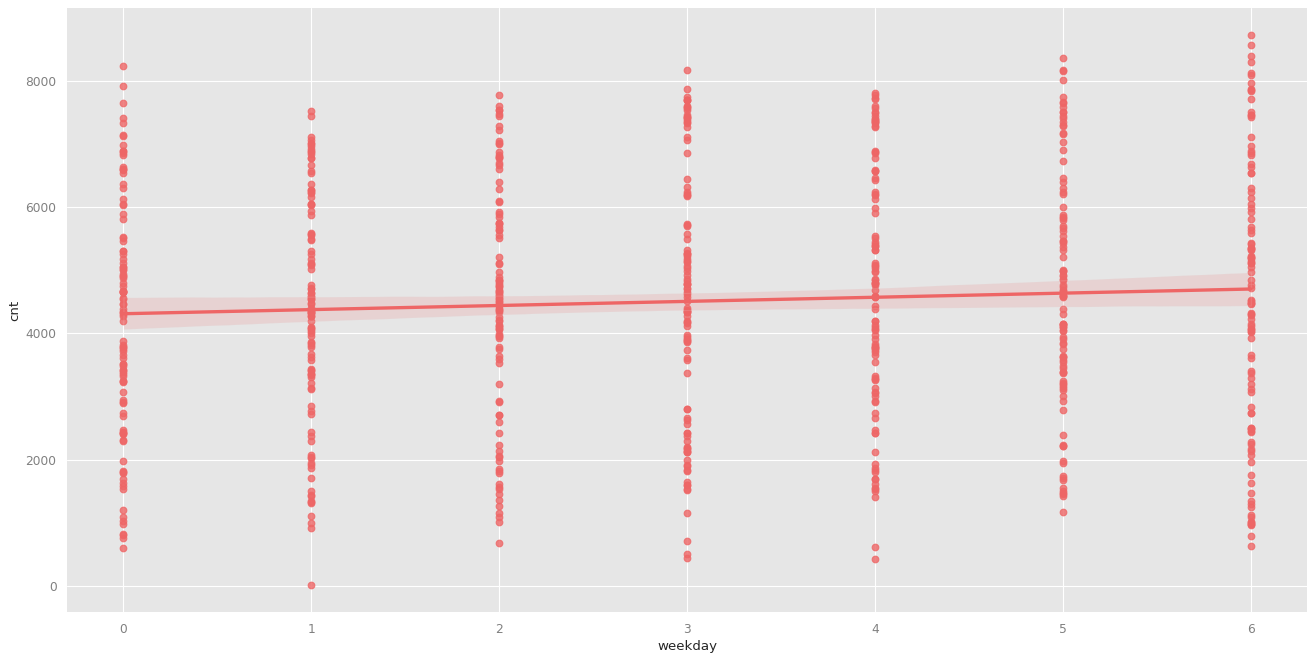

In [ ]:
# Biểu đồ số lượng người dùng theo các ngày trong tuần
sns.regplot(x="weekday", y="cnt", data=df_day)

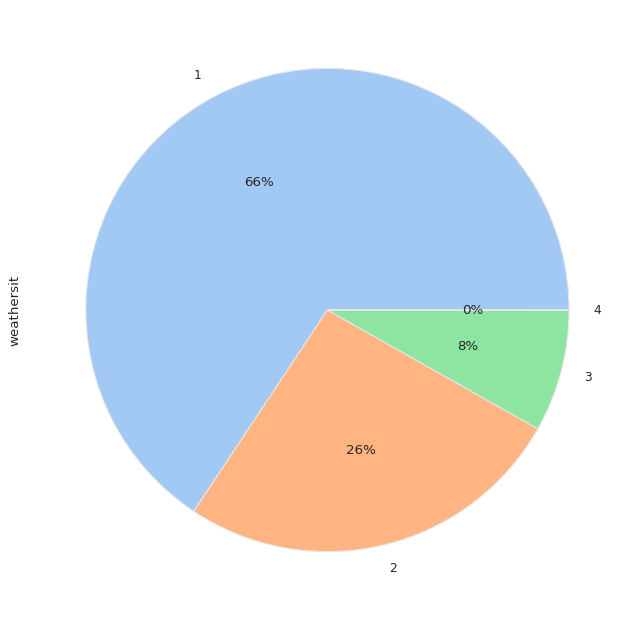

In [ ]:
# Biểu đồ thể hiện phân bố của số lượng người dùng theo dạng thời tiết (weathersit)
df_hour['weathersit'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors = sns.color_palette('pastel'))

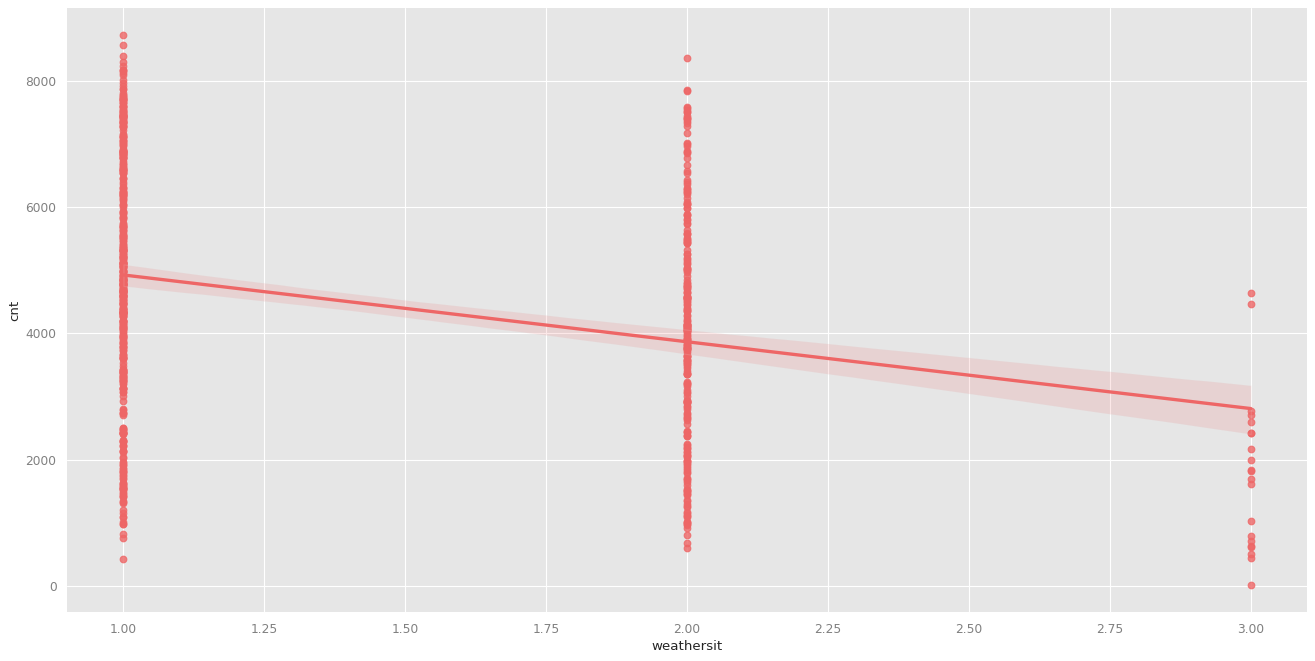

In [ ]:
# Biểu đồ số lượng người dùng theo dạng thời tiết (weathersit)
sns.regplot(x="weathersit", y="cnt", data=df_day)

➡️ Từ biểu đồ trên ta thấy nhu cầu thuê xe đạp tăng đồng nghĩa với việc số lượng người dùng cao khi thời tiết thuận lợi (dạng thời tiết 1 & 2), nhu cầu sẽ giảm đi đáng kể nếu thời tiết không thuận lợi (dạng thời tiết 3 & 4, dạng 4 gần như không có người thuê xe)

⏭️ Tiếp theo, ta sẽ vẽ biểu đồ từng cặp theo mối quan hệ như đã nói ở trên. Điều đặc biệt là ở cột các mùa chỉ có 4 mùa (Xuân, Hạ, Thu, Đông). Do đó mà ở đây ta sẽ dùng 4 mùa này để làm các nhãn trong biểu đồ các cặp.

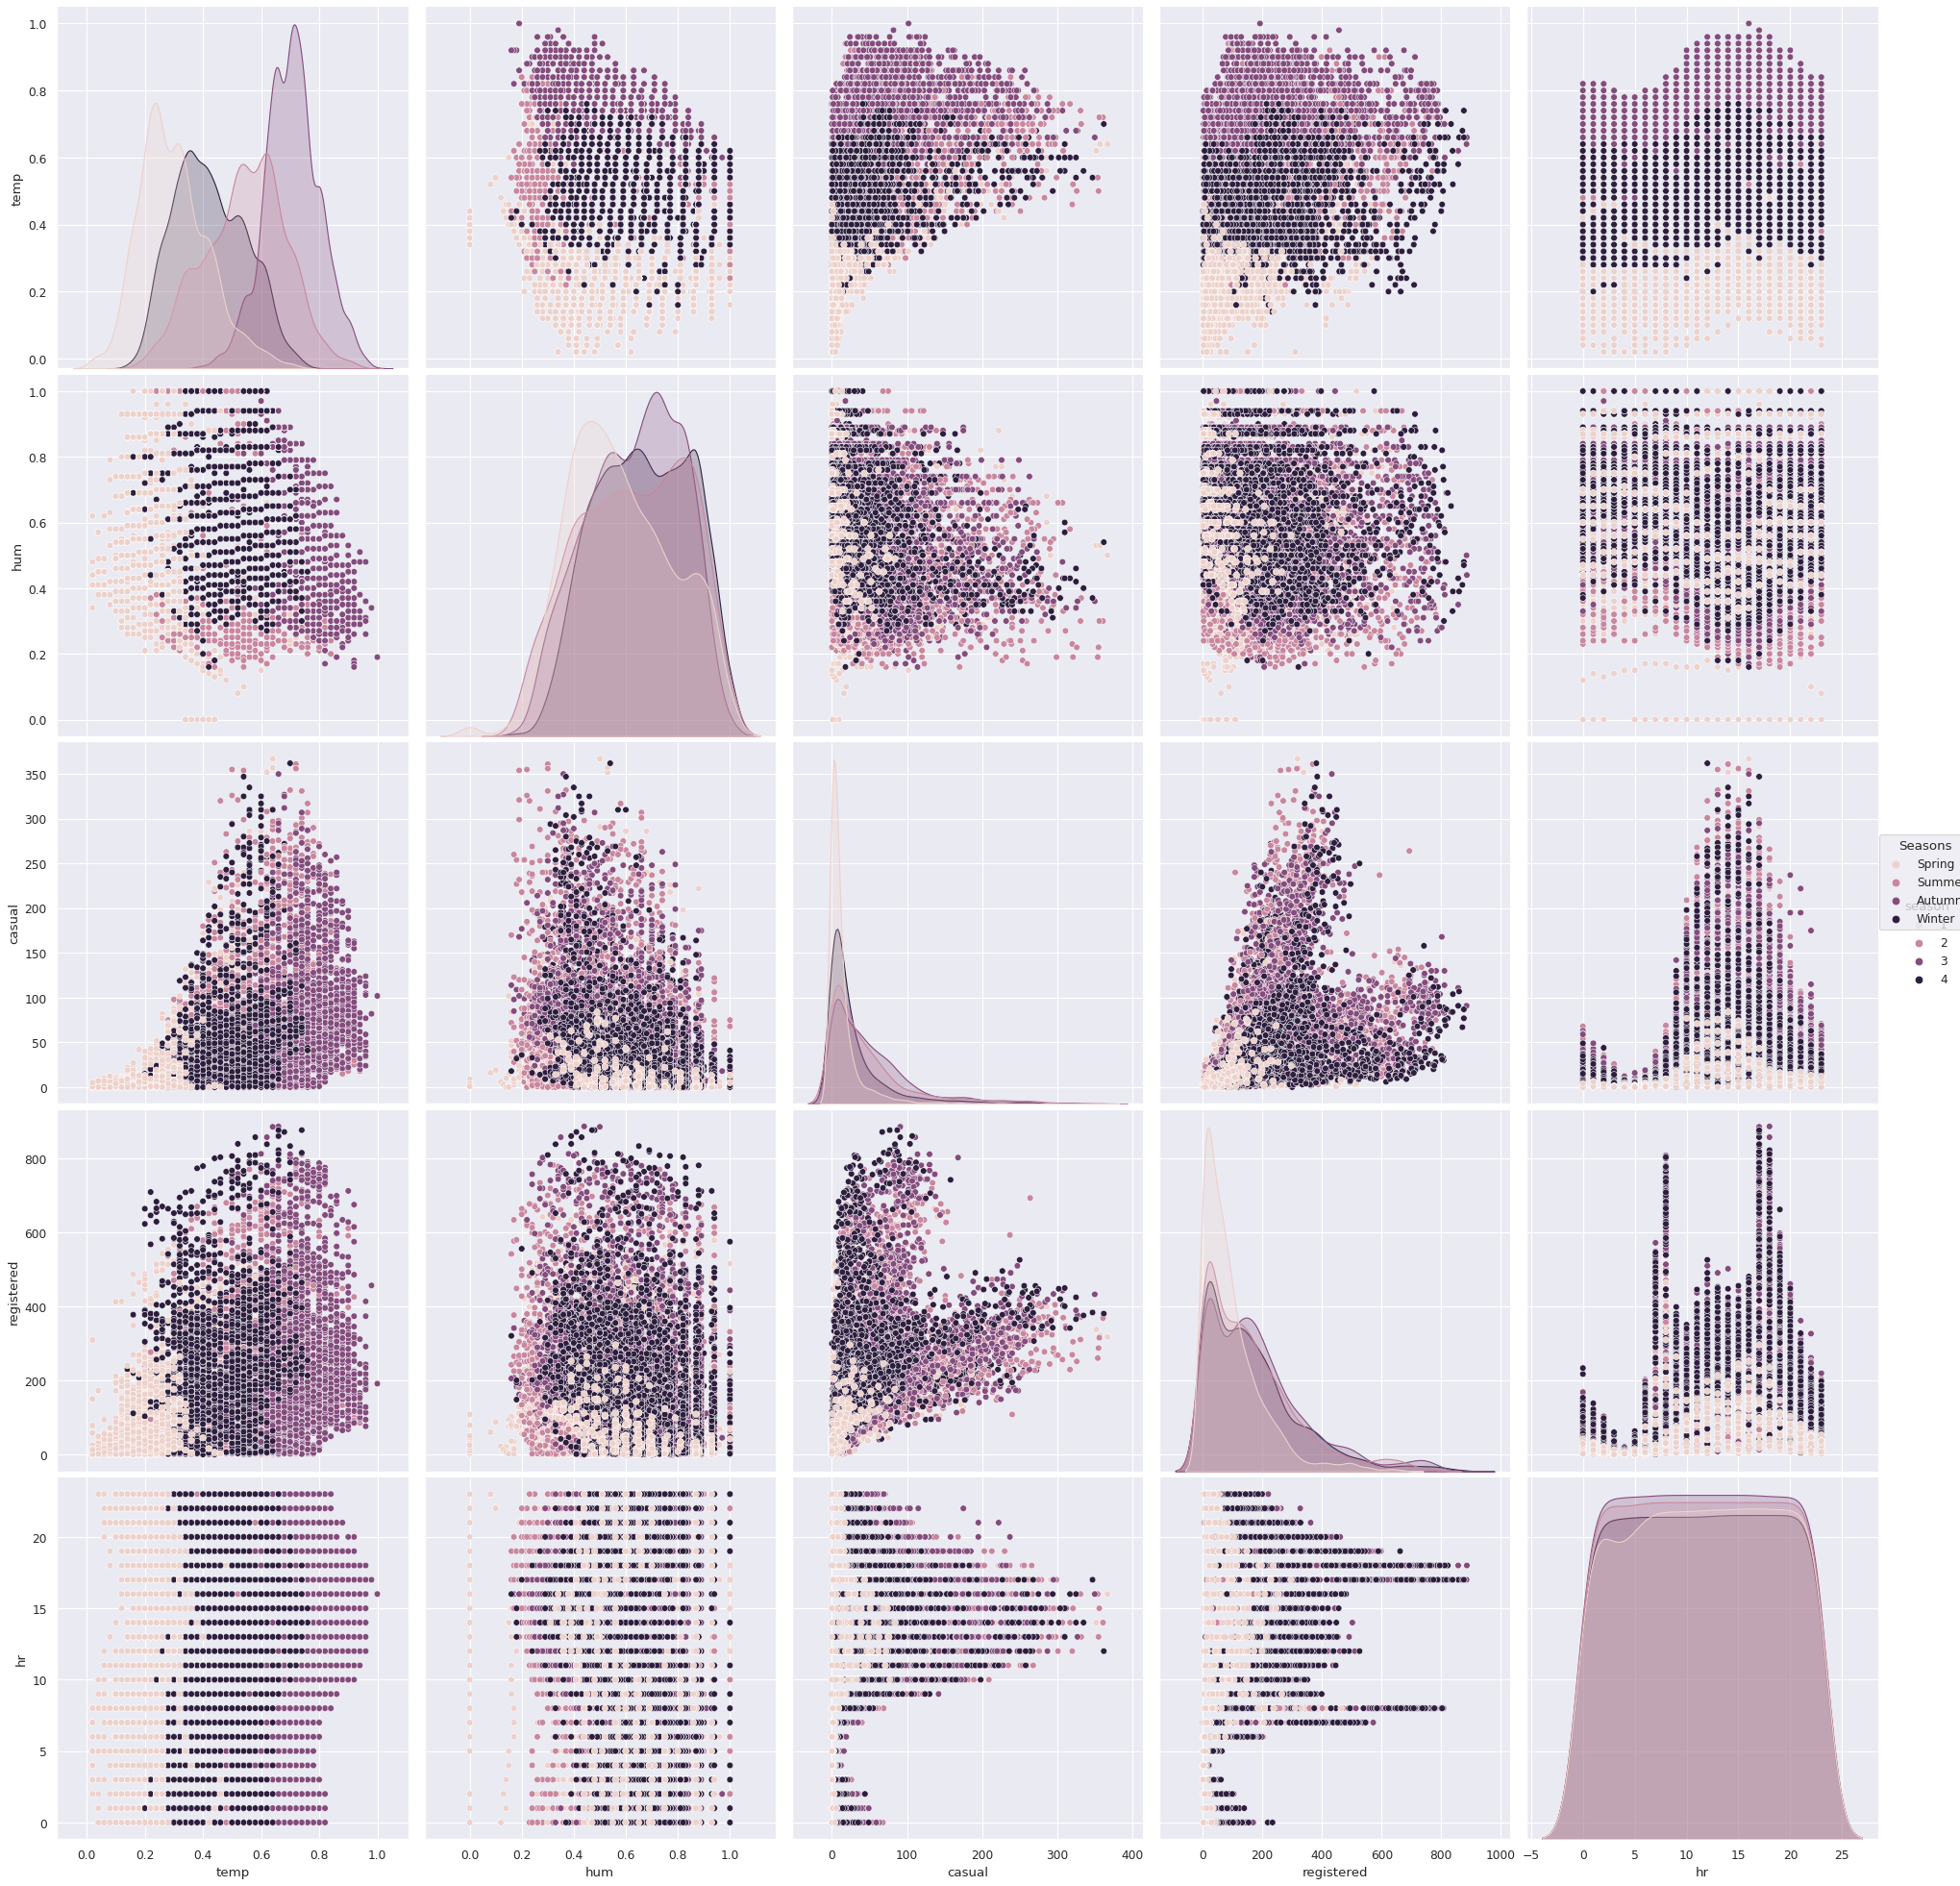

In [ ]:
# Vẽ biểu đồ cặp cho các cột
pair_df = df_hour[['temp', 'hum', 'season', 'casual', 'registered', 'hr']]
g = sns.pairplot(pair_df, hue='season', height=5)
handles = g._legend_data.values()
labels = ['Spring','Summer','Autumn','Winter']
g.fig.legend(handles=handles, labels=labels,title='Seasons',bbox_to_anchor=(1,0.55));

➡️ Vì sự đồng biến giữa các cột với nhau không lớn nên các điểm dữ liệu trên biểu đồ không phân hóa rõ ràng mà xen lẫn với nhau làm biểu đồ không được đẹp lắm.  
➡️ Mặc dù vậy vẫn có sự phân hóa rõ ràng ở những cột temp-registered hay temp-casual. Ta thấy lượng người dùng ở cả registered hay casual tăng mạnh trong mùa hè.  
➡️ Lượng người dùng casual tăng mạnh trong khoảng từ 10h - 20h, đạt đỉnh vào lúc khoảng 15h. Lượng người dùng registered nhiều nhất vào khoảng 8h & 17-18h, có thể đoán rằng nguyên nhân do nhu cầu cần di chuyển vào 2 thời điểm cao điểm nhất trong ngày là đầu sáng & sau khi tan ca làm.

(0.0, 550.0)

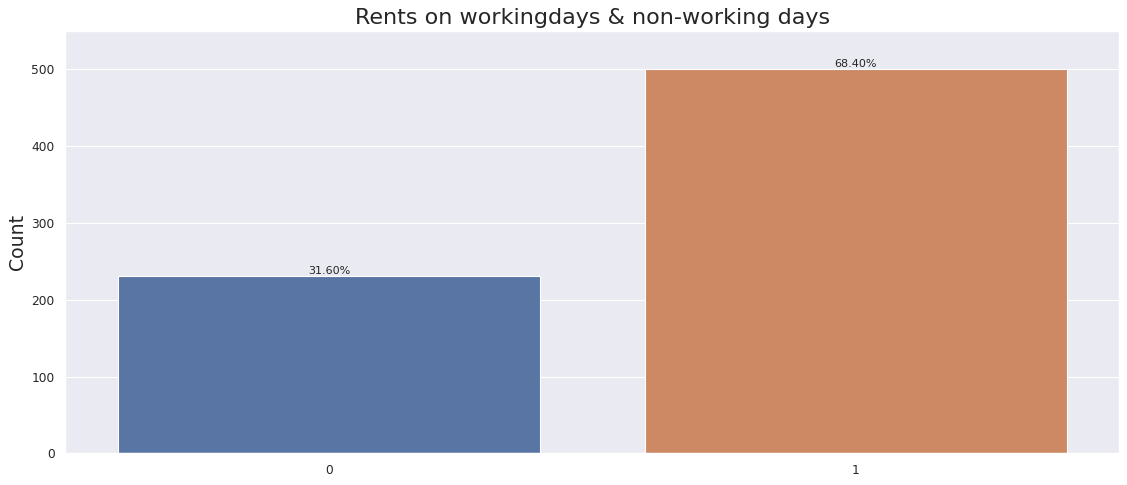

In [ ]:
# Rents on workingdays
total = len(df_day)
ax1 = plt.figure(figsize=(17,7))

g = sns.countplot(x='workingday', data=df_day)
g.set_title("Rents on workingdays & non-working days", fontsize=20)
g.set_xlabel("", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

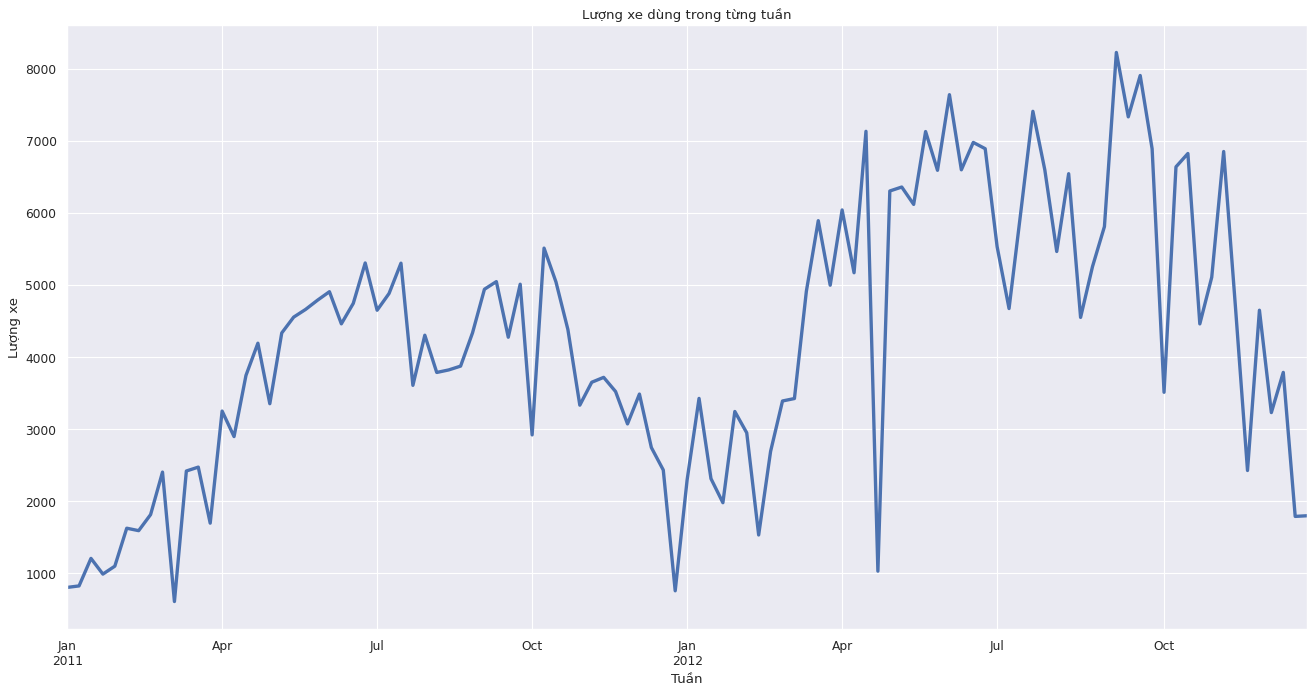

In [ ]:
# Lượng xe dùng trong từng tuần
df_day.index = pd.DatetimeIndex(df_day.dteday)
df_day['cnt'].asfreq('W').plot(linewidth = 3)     
plt.title('Lượng xe dùng trong từng tuần')
plt.xlabel('Tuần')
plt.ylabel('Lượng xe');

In [ ]:
# Nhóm lượng xe đạp theo từng giờ
avg_rent_hrs = df_hour.groupby('hr')['cnt'].mean()
# 5 khung giờ có lượng xe đạp cao nhất
avg_rent_hrs.sort_values().tail(5).sort_index()

hr
8     359.011004
16    311.983562
17    461.452055
18    425.510989
19    311.523352
Name: cnt, dtype: float64

In [ ]:
# 5 khung giờ có lượng xe đạp thấp nhất
avg_rent_hrs.sort_values().head(5).sort_index()

hr
1    33.375691
2    22.869930
3    11.727403
4     6.352941
5    19.889819
Name: cnt, dtype: float64

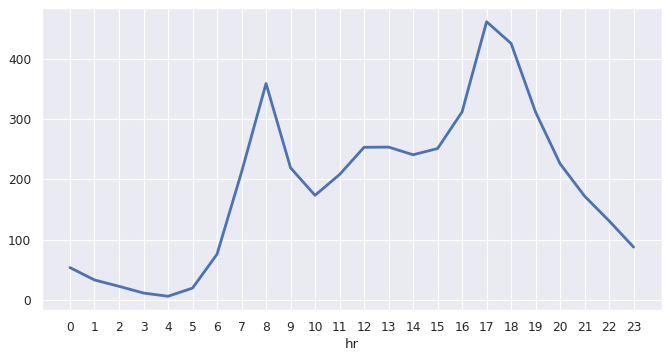

In [ ]:
# Line chart biểu diễn lượng xe đạp được thuê theo từng giờ 
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x=avg_rent_hrs.index, y=avg_rent_hrs.values, data=avg_rent_hrs,
                 linewidth  = 2.5, markers=True,ax=ax)
ax.set_xticks(range(len(avg_rent_hrs)));

In [ ]:
# Lượng xe trung bình hoạt động theo giờ
workingday_bike = df_hour.groupby(['hr','workingday'])['cnt'].mean().unstack()
workingday_bike.T

hr                0          1          2          3         4          5   \
workingday                                                                   
0           90.80000  69.508696  53.171053  25.775330  8.264317   8.689189   
1           36.78629  16.552632   8.683778   4.942553  5.429787  24.913131   

hr                  6           7           8           9           10  \
workingday                                                               
0            18.742358   43.406926  105.653680  171.623377  255.909091   
1           102.500000  290.612903  477.006048  241.518145  135.366935   

hr                  11          12          13          14          15  \
workingday                                                               
0           315.316017  366.259740  372.731602  364.645022  358.813853   
1           158.229839  200.820926  198.429719  183.572289  201.331325   

hr                  16          17          18          19          20  \
workingday                                                               
0           352.727273  323.549784  281.056522  231.673913  174.739130   
1           293.122244  525.290581  492.226908  348.401606  249.718876   

hr                  21          22         23  
workingday                                     
0           142.060870  116.060870  85.930435  
1           186.287149  138.389558  88.708835

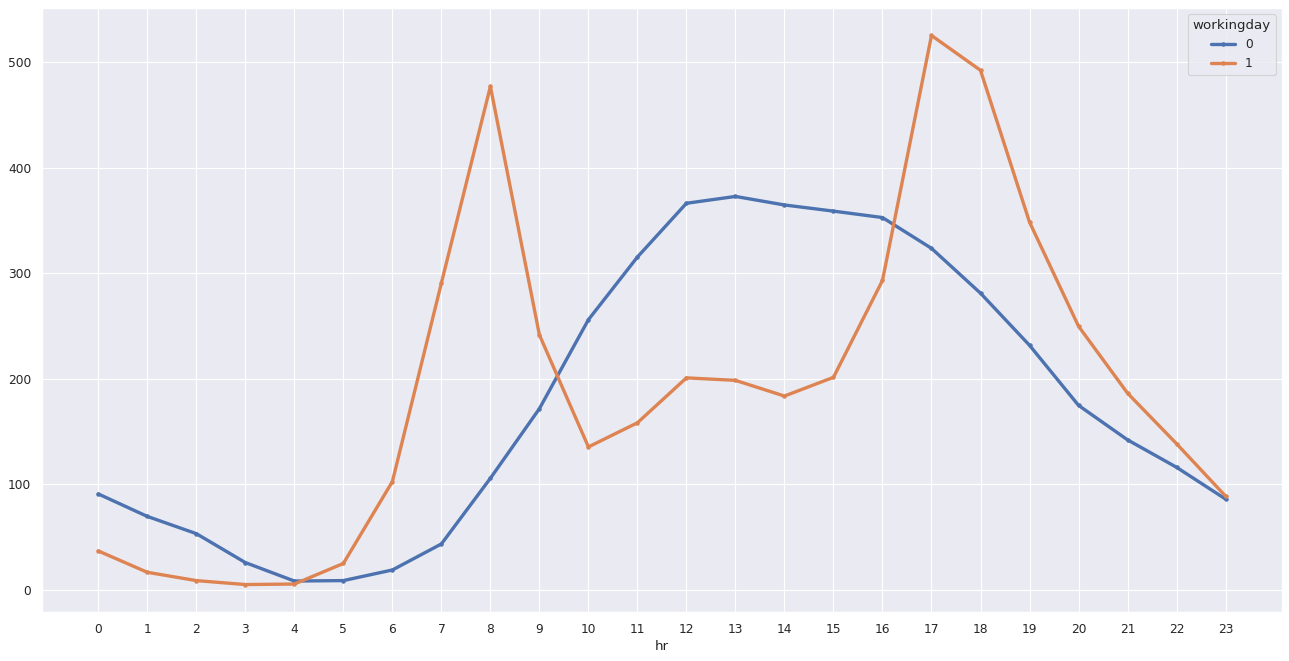

In [ ]:
# Biểu diễn lên đồ thị
ax = workingday_bike.plot(kind='line',style='.-',linewidth=3)
ax.set_xticks(range(len(df_hour.hr.unique()))) ;

In [ ]:
# Chuyển đổi giờ thành các buổi
def hour_transformer(x):
  if x >=4 and x <=7:
    return "Early Morning"
  elif x>=8 and x<=12:
    return "Morning"
  elif x >= 13 and x <=17:
    return "Afternoon" 
  elif x >=18 and x <=21:
    return "Evening"
  elif x>=22 or x <=3:
    return "Night"

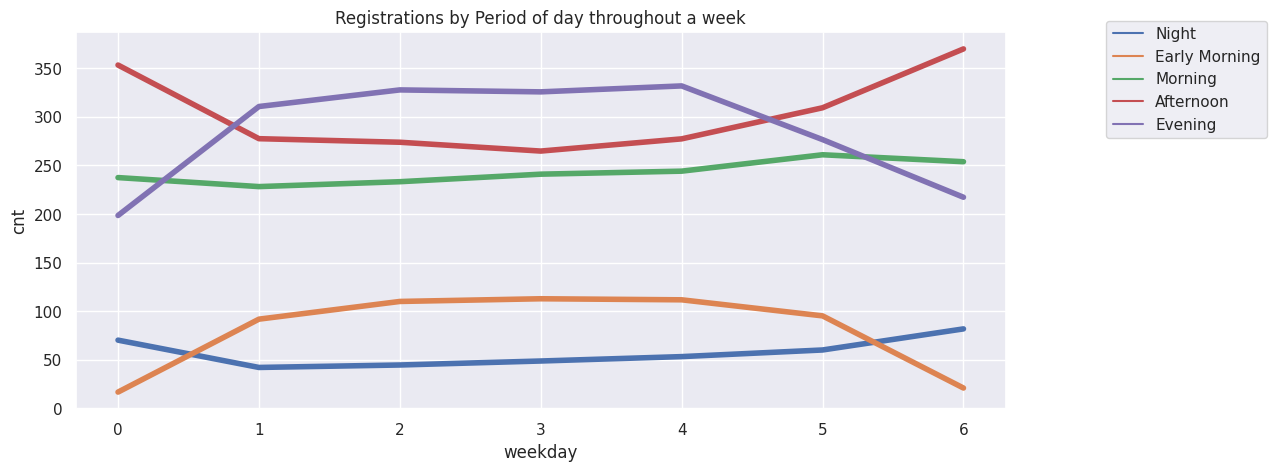

In [ ]:
# Lượng người dùng trong các buổi
df_period = df_hour.copy()
df_period['Period'] = df_period['hr'].apply(hour_transformer)
fig,ax = plt.subplots(figsize=(12,5),dpi=100)
sns.lineplot(data = df_period, x = 'weekday', y = 'cnt', hue = 'Period',ci=None,linewidth=4)
plt.title("Registrations by Period of day throughout a week")
ax.legend(bbox_to_anchor=(1.1, 1.05));

➡️ Từ biểu đồ trên, ta dễ dàng thấy được thời gian từ buổi đêm đến sáng sớm luôn có số lượng xe đạp thấp nhất và buổi tối luôn có nhiều người sử dụng xe đạp nhất. Có lẽ những người này dùng xe đạp để về nhà sau khi tan ca, điều này phần nào được kiểm chứng khi vào 2 ngày cuối tuần thì lượng xe đạp được dùng trong khoảng thời gian này giảm rõ rệt    
➡️ Buổi sáng của các ngày trong tuần có vẻ không có quá nhiều sự khác biệt tuy nhiên vào cuối tuần thì lượng xe đạp thay đổi khá nhiều trong buổi chiều & buổi tối.    
➡️ Như thông tin từ line plot phía trên thì lượng xe đạp vào buổi chiều & buổi tối luôn có lượng xe dùng cao hơn hẳn so với các buổi còn lại.   
➡️ Một điều đáng chú ý khác là lượng xe đạp vào tối thứ 6,7,CN là cao nhất so với cùng thời điểm các ngày khác trong tuần. Có thể là vì sáng hôm sau không phải đi làm nên người dân tận dụng thời gian để ra ngoài vui chơi, tụ tập cùng bạn bè.

In [ ]:
# Phân loại giữa working & non-working
bike_compare_df = df_day.copy()
bike_compare_df['DayType'] = 'workingday'
bike_compare_df.loc[(bike_compare_df.weekday == 0) ,'DayType'] = "Weekend"
bike_compare_df.loc[(bike_compare_df.weekday == 6) ,'DayType'] = "Weekend"
bike_compare_df.loc[(bike_compare_df.holiday == 1),'DayType'] = "Holiday"
bike_compare_df[['DayType','cnt']]

DayType   cnt
0       Weekend   985
1       Weekend   801
2    workingday  1349
3    workingday  1562
4    workingday  1600
..          ...   ...
726  workingday  2114
727  workingday  3095
728     Weekend  1341
729     Weekend  1796
730  workingday  2729

[731 rows x 2 columns]

In [ ]:
bike_compare_df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt     DayType  
0     985     Weekend  
1     801     Weekend  
2    1349  workingday  
3    1562  workingday  
4    1600  workingday  
..    ...         ...  
726  2114  workingday  
727  3095  workingday  
728  1341     Weekend  
729  1796     Weekend  
730  2729  workingday  

[731 rows x 17 columns]

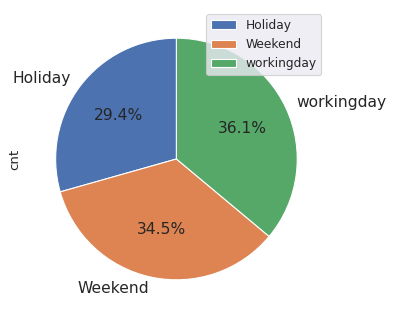

In [ ]:
# Lượng người dùng theo ngày làm việc & ngày nghỉ
mean_compare = bike_compare_df.groupby('DayType')['cnt'].mean()
mean_compare.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, 
                       labels=mean_compare.index, legend = True, fontsize=14,figsize=(8,5));

➡️ Có thể thấy phần lớn lượng xe đạp được sử dụng vào ngày làm việc cũng như cuối tuần. Còn vào những ngày lễ lượng xe ít hơn rõ rệt. Điều này có thể giải thích bằng việc vào kì nghỉ lễ thì người dân thường ở nhà cùng gia đình hoặc đi chơi xa bằng những phương tiện hiện đại hơn như xe hơi, máy bay,.. thay vì sử dụng xe đạp. Tuy nhiên ta cần phải kiểm tra để xem giải thích trên đã đúng hay chưa

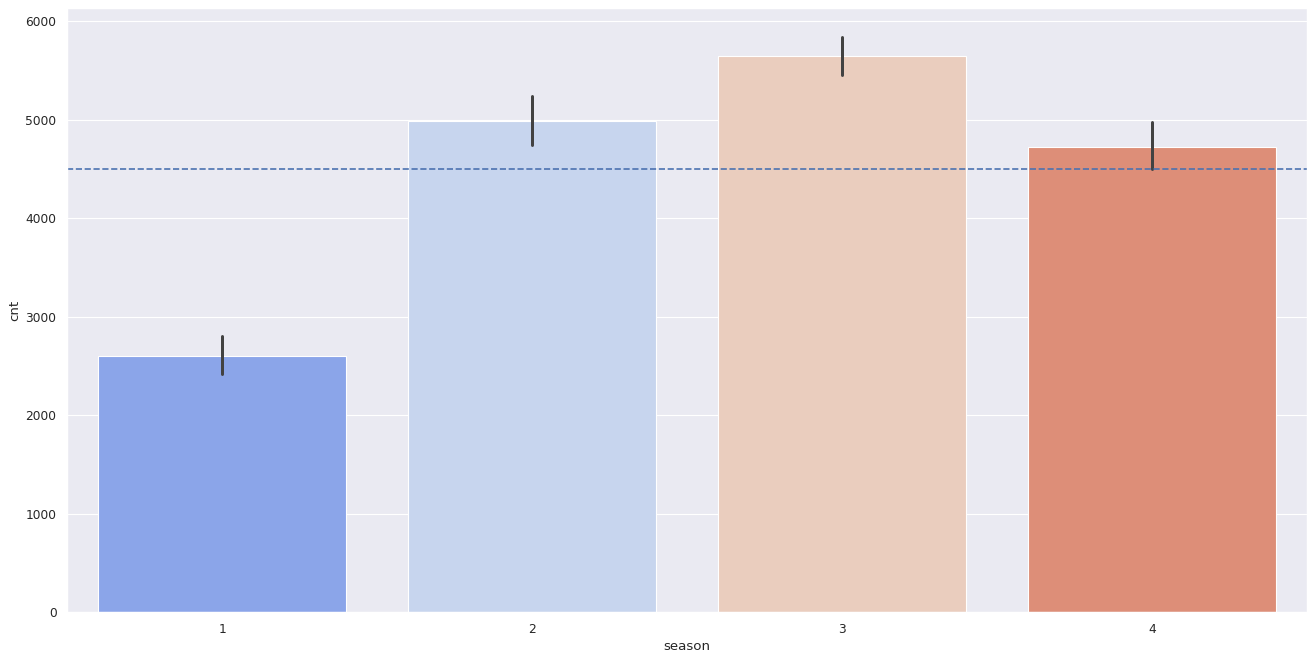

In [ ]:
bikecount_mean = df_day.groupby('dteday')['cnt'].mean().mean()
# bikecount_mean
sns.barplot(x='season',y='cnt', data=df_day, palette='coolwarm');
plt.axhline(bikecount_mean,ls='--');

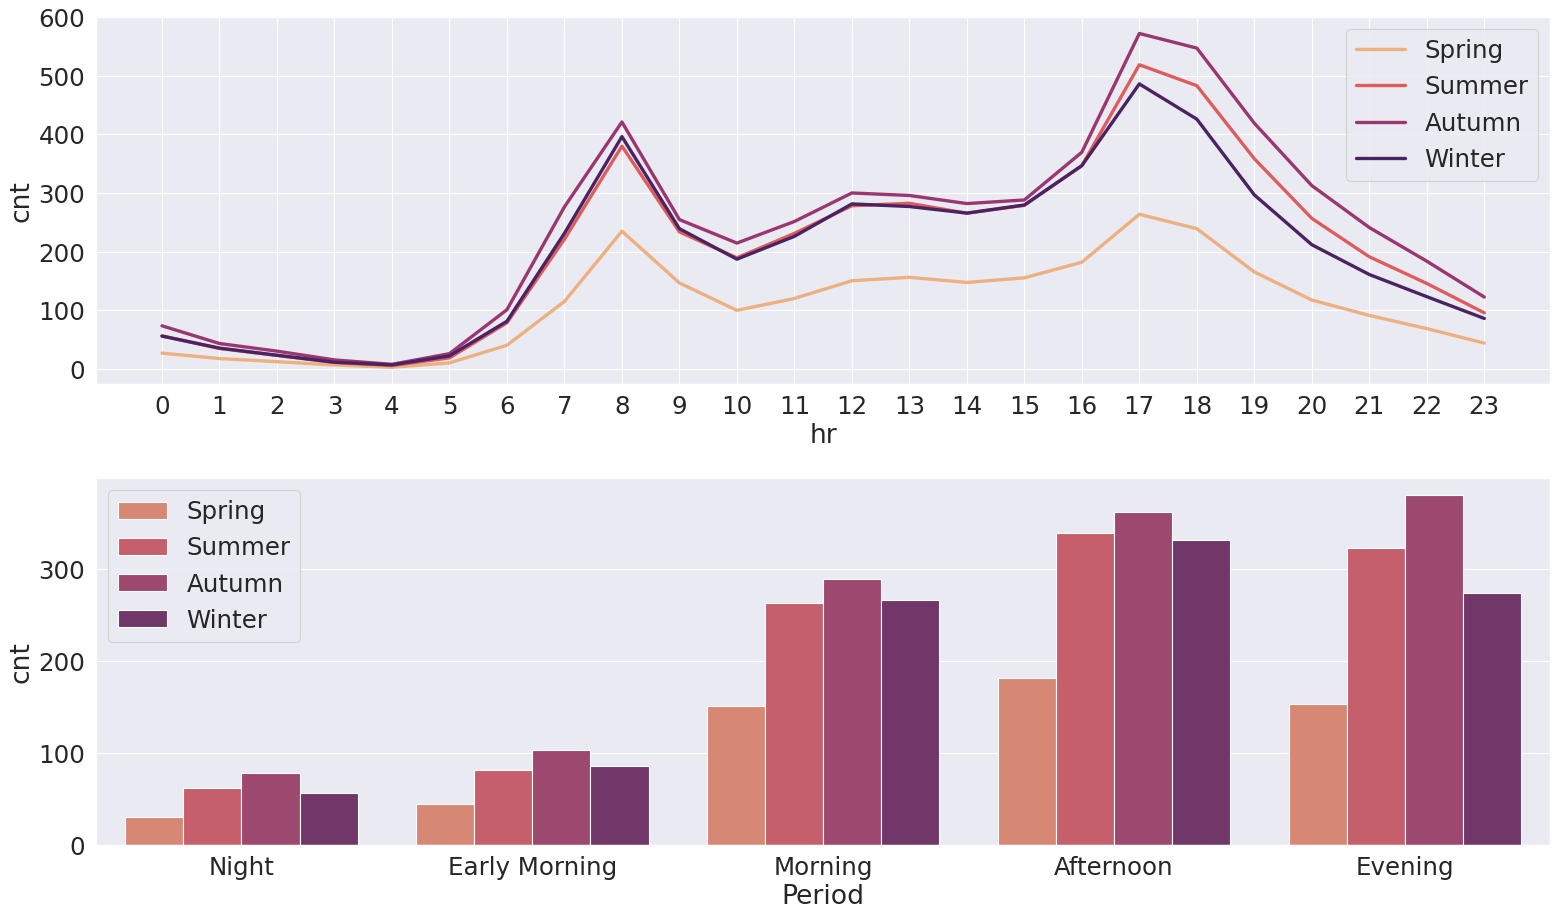

In [ ]:
# Lượng người dùng theo mùa
sns.set(font_scale=2)
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20,12),dpi=80)
sns.lineplot(data=df_hour, x="hr", y="cnt", hue="season",ci=None,
             palette="flare",linewidth = 3, ax=ax[0])
ax[0].legend(['Spring','Summer','Autumn','Winter'])
ax[0].set_xticks(np.arange(0,24));

sns.barplot(data = df_period, x = 'Period', y = 'cnt', hue = 'season',
            ci=None,palette="flare",ax=ax[1])
ax[1].legend(['Spring','Summer','Autumn','Winter'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


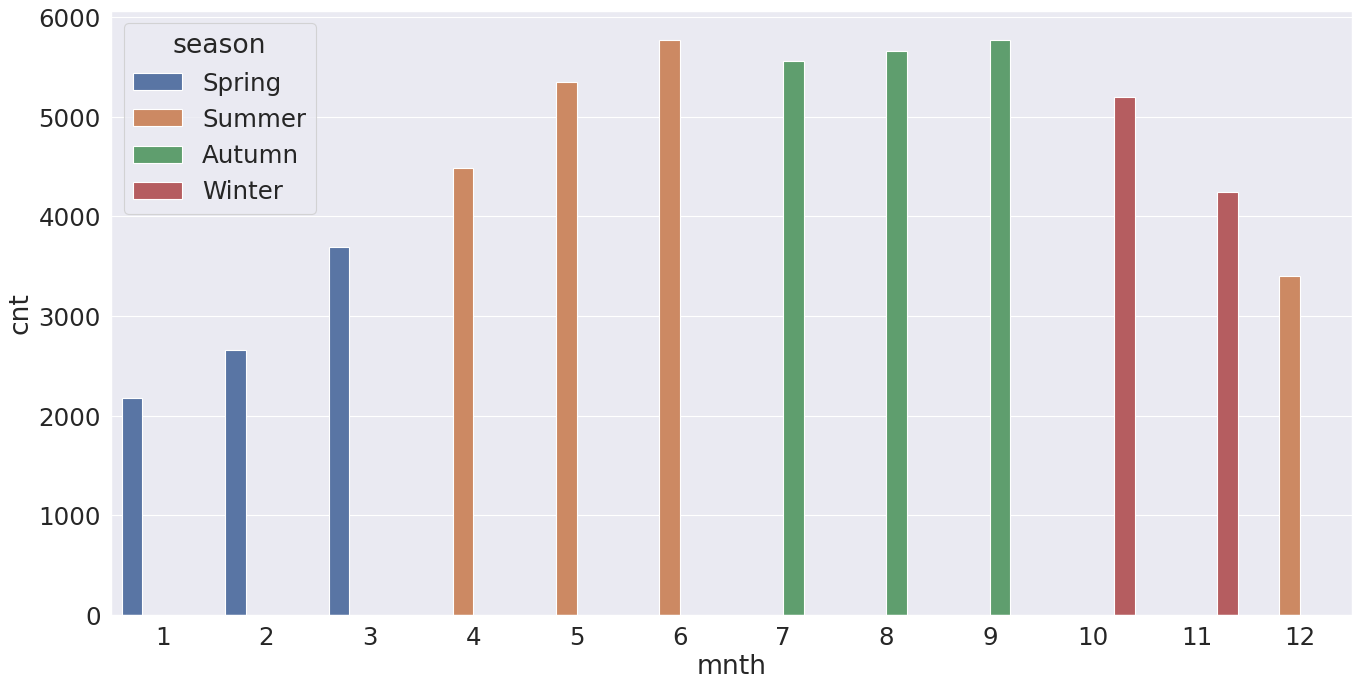

In [ ]:
# Lượng người dùng theo mùa
monthly_bike = df_day.groupby('mnth')['season','cnt'].mean()

monthly_bike = monthly_bike.apply(np.floor)
# monthly_bike

monthly_bike.loc[monthly_bike['season'] == 1, 'season'] = 'Spring'
monthly_bike.loc[monthly_bike['season'] == 2, 'season'] = 'Summer'
monthly_bike.loc[monthly_bike['season'] == 3, 'season'] = 'Autumn'
monthly_bike.loc[monthly_bike['season'] == 4, 'season'] = 'Winter'

fig,ax = plt.subplots(1,1)

sns.barplot(data = monthly_bike,x=monthly_bike.index,y='cnt',hue='season',ax=ax);

In [ ]:
df_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

**KẾT LUẬN**   
⭐Lượng người dùng thường có xu hướng tăng vào 6 tháng đầu năm & thường đạt đỉnh trong 3 tháng sau (mùa hè), ngược lại trong mùa hè lượng người dùng đã đăng ký lại giảm. Nguyên nhân là do thời tiết thuận lợi cho việc sử dụng xe đạp nên nhu cầu thuê xe đạp tăng.    
⭐Sự phát triển về số lượng người dùng trong 2 năm 2011 & 2012 có xu hướng & quy luật gần như nhau.   
⭐Tỉ lệ người dùng các ngày trong tuần & cuối tuần có sự chênh lệch đáng kể.     
⭐Lượng người dùng vào buổi chiều tối sẽ cao hơn nhiều so với sáng sớm.